<a href="https://colab.research.google.com/github/kangnurrohman/unstructured-data/blob/main/src/text%20data/Part%203%20-%20SMS%20Spam%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/data/data 5.zip", 'r')
zip_ref.extractall("data")
zip_ref.close()

In [ ]:
pip install jcopml luwiji

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.text_proc import illustration

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')

sw_indo = stopwords.words("indonesian") + list(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Import data

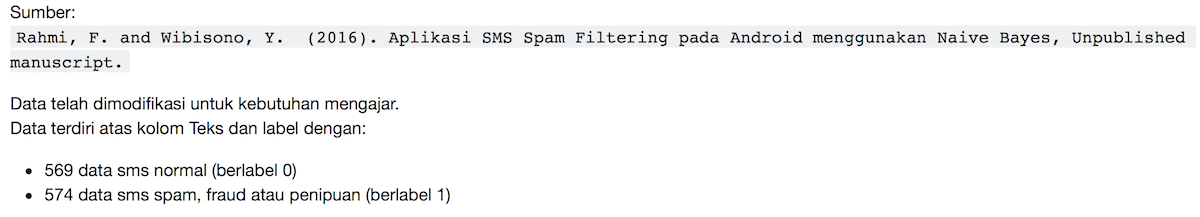

In [6]:
illustration.nomenklatur

In [7]:
df = pd.read_csv("data/spam.csv")
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,1
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",1
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,1


## Dataset Splitting

In [8]:
X = df.Teks
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914,), (229,), (914,), (229,))

## Train

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3,  n_iter=50, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)


{'algo__C': 16.50643041601458, 'algo__fit_intercept': True}
1.0 0.96388769053782 0.9781659388646288


## Sanity Check

In [11]:
text = ["Nasabah BRI Yth!!! No Rekening Anda Mendapatkan CEK Rp. 35.000.000,-. No.Undian Anda (254777) U/Info klik: https://bit.ly/2uVPljh"]
model.predict(text), model.predict_proba(text)

(array([1]), array([[0.00401872, 0.99598128]]))

In [12]:
text = ["""YTH,Bapak/Ibu
@nd@ Butuh Dan4
Proses Cepat & Mudah
Bung4 2%
T@np@ Survey
HUB WA O853 8682 8345."""]
model.predict(text), model.predict_proba(text)

(array([1]), array([[0.0586933, 0.9413067]]))

In [13]:
text = ["""WHITELABEL LX GROUP!https://cutt.ly/acctoto
ACCTOTO bagi bagi bonus jutaan rupiah
untuk informasi lebih lanjut silahkan cek langsung di situs kami!"""]
model.predict(text), model.predict_proba(text)

(array([1]), array([[0.17846089, 0.82153911]]))